# LSTM
Modificar las variables para evaluar otra acción o la fecha.


In [ ]:
# --------------------------------
# ----- Variables del modelo -----
# --------------------------------
ACCION = 'AAPL'
FECHA_INICIO = '2016-01-01'
FECHA_FINAL  = '2017-12-01'

In [ ]:
# Importaciones generales
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd

# Para cargar los datos de Yahoo Finance 
from pandas_datareader.data import DataReader

# Para los modelos
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
# Utilidades

def graficar_predicciones(real, prediccion):
    plt.plot(real[0:len(prediccion)],color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

In [ ]:
dataset = DataReader(
    ACCION, 
    data_source='yahoo', 
    start=FECHA_INICIO, 
    end=FECHA_FINAL
)

dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.251436
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.643711
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.181015
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.202667
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.320066


In [ ]:
set_entrenamiento = dataset[:'2016'].iloc[:,0:1]
set_validacion = dataset['2017':].iloc[:,0:1]

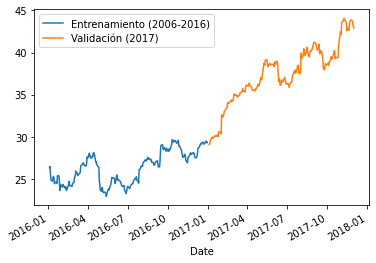

In [ ]:
set_entrenamiento['High'].plot(legend=True)
set_validacion['High'].plot(legend=True)
plt.legend(['Entrenamiento (2006-2016)', 'Validación (2017)'])
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [ ]:
# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

In [ ]:
for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#
# Red LSTM
#
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [ ]:
modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)

Epoch 1/20
6/6 [==============================] - 2s 19ms/step - loss: 0.2331
Epoch 2/20
6/6 [==============================] - 0s 17ms/step - loss: 0.0264
Epoch 3/20
6/6 [==============================] - 0s 20ms/step - loss: 0.0263
Epoch 4/20
6/6 [==============================] - 0s 19ms/step - loss: 0.0231
Epoch 5/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0192
Epoch 6/20
6/6 [==============================] - 0s 20ms/step - loss: 0.0149
Epoch 7/20
6/6 [==============================] - 0s 22ms/step - loss: 0.0147
Epoch 8/20
6/6 [==============================] - 0s 35ms/step - loss: 0.0137
Epoch 9/20
6/6 [==============================] - 0s 30ms/step - loss: 0.0144
Epoch 10/20
6/6 [==============================] - 0s 33ms/step - loss: 0.0147
Epoch 11/20
6/6 [==============================] - 0s 31ms/step - loss: 0.0122
Epoch 12/20
6/6 [==============================] - 0s 31ms/step - loss: 0.0126
Epoch 13/20
6/6 [==============================] - 0s 40ms/st

In [ ]:
#
# Validación (predicción del valor de las acciones)
#
x_test = set_validacion.values
x_test = sc.transform(x_test)
print(x_test)
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

[[0.91265728]
 [0.91931902]
 [0.93227233]
 [0.98038495]
 [1.02738704]
 [1.02553644]
 [1.04589185]
 [1.02257589]
 [1.03441895]
 [1.05736474]
 [1.06698732]
 [1.05181324]
 [1.06513672]
 [1.07846021]
 [1.05218341]
 [1.12620265]
 [1.13878606]
 [1.13545505]
 [1.10880808]
 [1.09992585]
 [1.43671359]
 [1.39600279]
 [1.38860097]
 [1.43708348]
 [1.49592864]
 [1.50074007]
 [1.50925212]
 [1.52738704]
 [1.55995568]
 [1.60695749]
 [1.65062913]
 [1.63693519]
 [1.63434481]
 [1.66839359]
 [1.68208696]
 [1.69541045]
 [1.66506286]
 [1.69393031]
 [1.69393031]
 [1.79422606]
 [1.79903749]
 [1.78238327]
 [1.78016279]
 [1.78793449]
 [1.78127303]
 [1.74389296]
 [1.76498871]
 [1.76757909]
 [1.77572125]
 [1.81643205]
 [1.82642481]
 [1.82568446]
 [1.84418927]
 [1.89230188]
 [1.84789045]
 [1.8471501 ]
 [1.85307178]
 [1.83382662]
 [1.93819344]
 [1.95484822]
 [1.95521812]
 [1.94670606]
 [1.94115428]
 [1.96965184]
 [1.9907476 ]
 [1.95595847]
 [1.94337477]
 [1.93227233]
 [1.91265728]
 [1.86824529]
 [1.87675791]
 [1.85

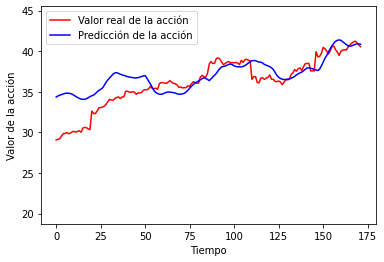

In [ ]:
# Graficar resultados
graficar_predicciones(set_validacion.values,prediccion)

In [ ]:
set_validacion.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2017-11-17', '2017-11-20', '2017-11-21', '2017-11-22',
               '2017-11-24', '2017-11-27', '2017-11-28', '2017-11-29',
               '2017-11-30', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=232, freq=None)

In [ ]:
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e251de5-0dc4-4401-98b7-759471e83f8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>